# OSM Kent Railways Import

Go to (Overpass Turbo)[https://overpass-turbo.eu/] and export railway route data via the wizard with route=train


In [1]:
import configparser
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import webbrowser
from sqlalchemy import create_engine


DATA_DIR = os.path.join('D:\\Data\\TPAM\\')
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

In [2]:

osmhistory_railroutes = gpd.read_file(DATA_DIR + "osmhistory_railroutes.geojson")
closed_routes = gpd.read_file(DATA_DIR + "Closed UK Railways.kml", driver='KML')

c:\Users\paulf\anaconda3\envs\GeoDjango\lib\site-packages\geopandas\geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [3]:
def create_folium_map(routes_to_map):
    m = folium.Map(location=[52.48, 0], zoom_start= 7, tiles='cartodbpositron')
    folium.GeoJson(data=routes_to_map["geometry"]).add_to(m)
    m.save('temporary_map.html')
    webbrowser.open('temporary_map.html', new=2)
    return

In [4]:
def print_df_info(df):
    #routes.to_csv('df.csv', index=False)
    print(type(df))
    print(df.head())
    print(df.crs)
    print(df.total_bounds)
    print(df.info())
    df.plot(figsize=(6, 6))
    plt.show()
    return

In [5]:

config = configparser.ConfigParser()
KEYS_DIR = os.path.join("D:\\Data", "API_Keys")
config.read(os.path.join(KEYS_DIR, "TPAMWeb.ini"))
db_pswd = config['MySQL']['p']
engine = create_engine('postgresql://postgres:' + db_pswd + '@localhost/TPAM')


<class 'geopandas.geodataframe.GeoDataFrame'>
                id              @id               from  \
0   relation/76951   relation/76951           Oostende   
1  relation/112662  relation/112662          Bruxelles   
2  relation/125414  relation/125414  London Paddington   
3  relation/127126  relation/127126    Ipswich Station   
4  relation/138808  relation/138808               None   

                                             name  \
0              IC-01 Oostende - Bruxelles - Eupen   
1                 Eurostar : Bruxelles -> Londres   
2               GWR: London Paddington - Penzance   
3  Felixstowe Branch Line - Ipswich to Felixstowe   
4                                    Bittern Line   

                           name:de       network network:wikidata  \
0  IC-01 Ostende - Brüssel - Eupen            IC         Q1665939   
1                             None      Eurostar          Q156013   
2                             None      national             None   
3         

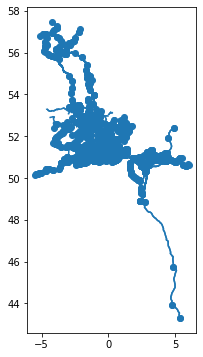

In [10]:
routes = gpd.read_file(DATA_DIR + "osm_railroutes.geojson")
routes.to_postgis(name="locos_routes_geo_osm", if_exists='append', index=False, con=engine)
create_folium_map(routes)
print_df_info(routes)

<class 'geopandas.geodataframe.GeoDataFrame'>
                 id               @id building layer  \
0  relation/2693956  relation/2693956      yes     1   
1  relation/2693958  relation/2693958      yes  None   
2  relation/2693959  relation/2693959      yes  None   
3  relation/2693960  relation/2693960      yes    -1   
4     way/198163527     way/198163527      yes  None   

                                   name public_transport  railway  start_date  \
0            St Pancras Railway Station          station  station  1868-10-01   
1  St Pancras Railway Station Extension          station  station        2007   
2                          King's Cross          station  station        1852   
3                     London Paddington          station  station        1838   
4                            Wagon Lift             None  station        1854   

  train          type  ... name:1886-1937 name:1937- source:data  \
0   yes  multipolygon  ...           None       None        No

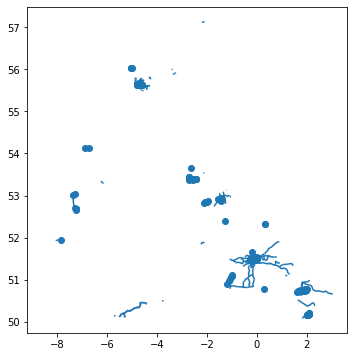

In [12]:
routes = gpd.read_file(DATA_DIR + "osmhistory_railroutes.geojson")
routes.to_postgis(name="locos_routes_geo_osmhistory", if_exists='append', index=False, con=engine)
create_folium_map(routes)
print_df_info(routes)

### Closed UK Railways
Data download from a map [created by a contributor on Google maps](https://www.google.com/maps/d/viewer?ie=UTF8&oe=UTF8&msa=0&mid=1-qtKdwA-_7Y1msH5nlUbVKMjdMk&ll=51.17557904660408%2C-0.34163366478264123&z=9)
Note that in Postgres/Django the column "Name" has been changed to "name". Needs to be changed back temporarily for this load to work.

c:\Users\paulf\anaconda3\envs\GeoDjango\lib\site-packages\geopandas\geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


<class 'geopandas.geodataframe.GeoDataFrame'>
                                    Name  \
0                Solway Junction Railway   
1                     Carlisle - Silloth   
2                   Brampton Town branch   
3                  Gairs Colliery branch   
4  Lambley - Brampton Junction (Cumbria)   

                                         Description  \
0  Primarily built as route for Cumbrian ironston...   
1                 Opened:<br>- 1856Closed:<br>- 1964   
2  Opened:<br>- 1775 (Earl of Carlisle's Waggonwa...   
3                                                      
4  Brampton & Hartleyburn Railway<br><br>Formerly...   

                                            geometry  
0  LINESTRING Z (-3.21041 55.04879 0.00000, -3.21...  
1  LINESTRING Z (-3.38961 54.86762 0.00000, -3.38...  
2  LINESTRING Z (-2.70181 54.93277 0.00000, -2.70...  
3  LINESTRING Z (-2.64581 54.92878 0.00000, -2.64...  
4  LINESTRING Z (-2.50979 54.91742 0.00000, -2.50...  
epsg:4326
[-5.346484 5

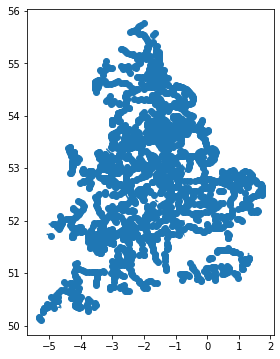

In [13]:
closed_routes = gpd.read_file(DATA_DIR + "Closed UK Railways.kml", driver='KML')
closed_routes.to_postgis(name="locos_routes_geo_closed", if_exists='append', index=False, con=engine)
create_folium_map(closed_routes)
print_df_info(closed_routes)

In [10]:
admin_boundaries = gpd.read_file("D:\\Data\\UK_Admin_Boundaries\\" + "Counties_and_Unitary_Authorities__December_2019__Boundaries_UK_BFE.shp")
admin_boundaries.to_postgis(name="UK_admin_boundaries", if_exists='append', index=False, con=engine)
create_folium_map(admin_boundaries)
print_df_info(admin_boundaries)

ValueError: The CRS of the target table (EPSG:4326) differs from the CRS of current GeoDataFrame (EPSG:27700).